# Приоритезация гипотез, результаты AB-теста для интернет-магазина

Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки крупного интернет-магазина.

**Цель исследования** – приоритизировать гипотезы и проанализировать результаты A/B-теста. 
    
В датасете представлено 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Задача – применить фреймворки ICE и RICE для приоритизации гипотез.

В логах `orders` и `visitors` хранится информация о проведенном A/B-тесте – данные о заказах и данные о пользователях двух групп соответственно. В рамках проекта нужно проанализировать его результаты и принять решение: остановить тест и зафиксировать победу одной из групп или отсутствие различий между ними, продолжить тест.

___________

# Приоритизация гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np
import datetime as dt

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', 110)

import warnings 
warnings.filterwarnings("ignore")

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis                         

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<b>- Применим фреймворк ICE для приоритизации гипотез.</b>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


В приоритете по методу приоритезации гипотез ICE стоит гипотеза «Запустить акцию, дающую скидку на товар в день рождения»

<b>- Применим фреймворк RICE для приоритизации гипотез.</b>

In [6]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В приоритете по методу приоритезации гипотез RICE стоит гипотеза «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок»

Рассчитав ICE, мы получили наибольшую оценку по гипотезам 8, 0 и 7. Однако по фреймворку RICE в топ вышли гипотезы 7, 2 и 0. Дело в том, что RICE учитывает охват, а ICE нет. А поскольку нам нужно приоритезировать гипотезу для увеличения выручки, метрика `Reach` важна. Поэтому наиболее приоритетными гипотезами будут по фреймворку RICE – 7, 2, 0.

# Анализ A/B-теста.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.duplicated().sum()

0

В датафрейме orders нет пропусков и дубликатов. Нужно изменить date в формат даты.

In [10]:
orders.columns = [x.lower() for x in orders.columns]
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.duplicated().sum()

0

В датафрейме visits нет пропусков и дубликатов. Нужно изменить date в формат даты.

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<b>- График кумулятивной выручки по группам.</b>

In [16]:
#покупки по дням в каждой группе
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_1'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_1').cumsum().reset_index()
orders_cumsum

,date,group,orders,buyers,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,63,354874
...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398
58,2019-08-30,A,545,531,4022970
59,2019-08-30,B,620,608,5774631
60,2019-08-31,A,557,543,4084803


In [17]:
#сумма визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

visitors_cumsum['group_1'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_1').cumsum().reset_index()

visitors_cumsum

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


In [18]:
cumulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cumulative

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,63,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708
58,2019-08-30,A,545,531,4022970,18037
59,2019-08-30,B,620,608,5774631,18198
60,2019-08-31,A,557,543,4084803,18736


In [19]:
cumulative['avg_check'] = cumulative['revenue'] / cumulative['orders']
cumulative['conversion'] = cumulative['orders'] / cumulative['visitors']
cumulative

,date,group,orders,buyers,revenue,visitors,avg_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708,9327.848993,0.033657
58,2019-08-30,A,545,531,4022970,18037,7381.596330,0.030216
59,2019-08-30,B,620,608,5774631,18198,9313.920968,0.034070
60,2019-08-31,A,557,543,4084803,18736,7333.578097,0.029729


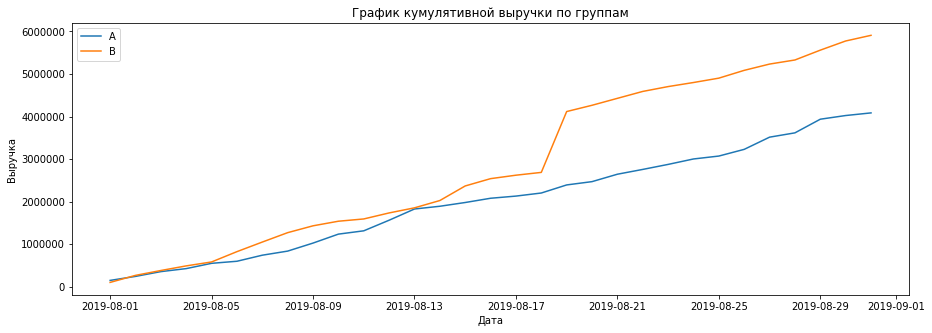

In [20]:
#выручка для каждой из групп
cumulativeRevenueA = cumulative[cumulative['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulative[cumulative['group']=='B'][['date','revenue', 'orders']]

#График кумулятивной выручки по группам
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

На графике видно, что выручка группы B больше, чем группы A. Во второй половине августа у группы B похоже выброс.

<b>- График кумулятивного среднего чека по группам.</b>

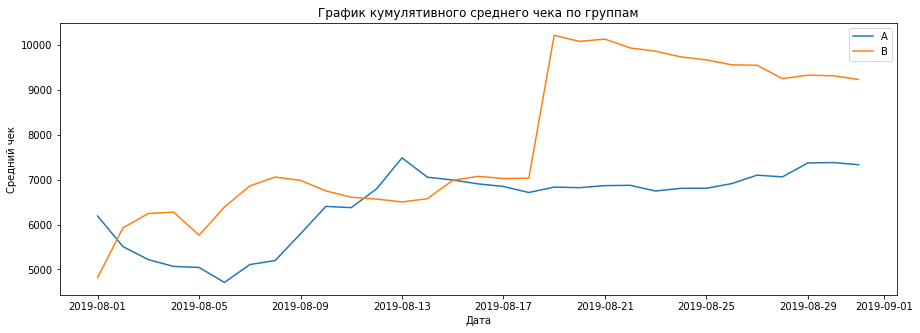

In [21]:
cumulativeAvgCheckA = cumulative[cumulative['group']=='A'][['date', 'avg_check']]
cumulativeAvgCheckB = cumulative[cumulative['group']=='B'][['date', 'avg_check']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeAvgCheckA['date'], cumulativeAvgCheckA['avg_check'], label = 'A')
plt.plot(cumulativeAvgCheckB['date'], cumulativeAvgCheckB['avg_check'], label = 'B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Средний чек группы B почти всегда выше, чем у группы A. Во второй половине августа у группы B виден скачок, после которого идет плавное падение – похоже на «возвращение к среднуму» после единоразовых мощных выбросов. Можем предположить, есть аномалии. 

<b>- График относительного изменения кумулятивного среднего чека группы B к группе A.</b>

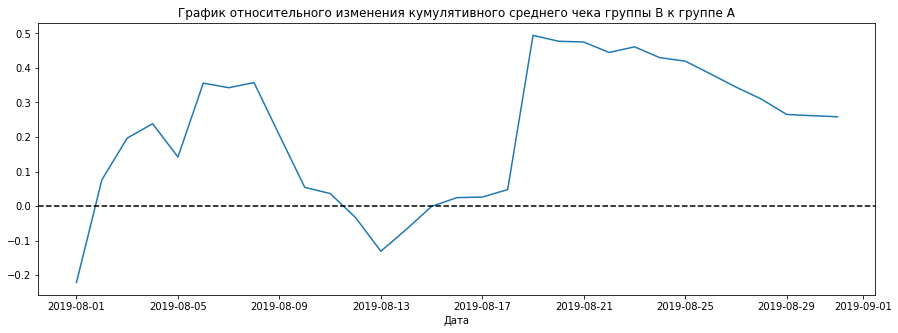

In [22]:
mergedCumulativeAvgCheck = cumulativeAvgCheckA[['date','avg_check']].merge(cumulativeAvgCheckB[['date','avg_check']], 
                                                                           left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeAvgCheck['date'], mergedCumulativeAvgCheck['avg_check_B']/
                                       mergedCumulativeAvgCheck['avg_check_A']-1)
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

Слишком большие колебания. Нужно будет проверить данные на аномалии.

<b>- График кумулятивной конверсии по группам.</b>

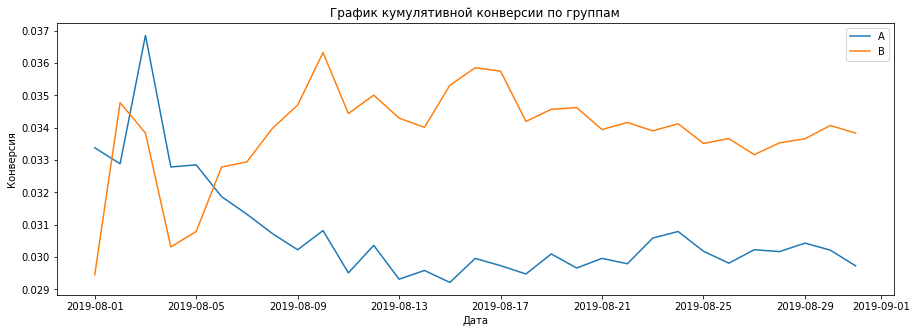

In [23]:
cumulativeConversionA = cumulative[cumulative['group']=='A'][['date', 'conversion']]
cumulativeConversionB = cumulative[cumulative['group']=='B'][['date', 'conversion']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeConversionA['date'], cumulativeConversionA['conversion'], label='A')
plt.plot(cumulativeConversionB['date'], cumulativeConversionB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

В начале теста был скачок конверсии у обеих групп. В общем конверсия группы B больше, чем у группы A. После 18.08 метрика относительно стабилизировалась.

<b>- График относительного изменения кумулятивной конверсии группы B к группе A. </b>

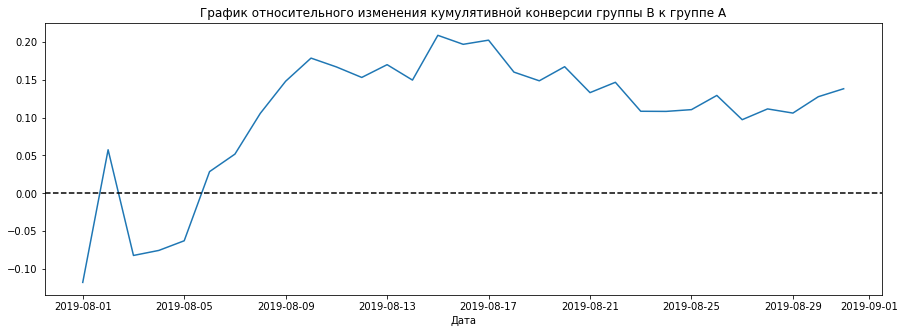

In [24]:
mergedCumulativeConversion = cumulativeConversionA[['date','conversion']].merge(cumulativeConversionB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversion['date'], mergedCumulativeConversion['conversion_B']/
                                       mergedCumulativeConversion['conversion_A']-1)
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()

Спустя неделю после начала теста конверсия группы B лучше, чем конверсия группы A.

<b>- Точечный график количества заказов по пользователям.</b>

In [25]:
ordersByUsers = (
     orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


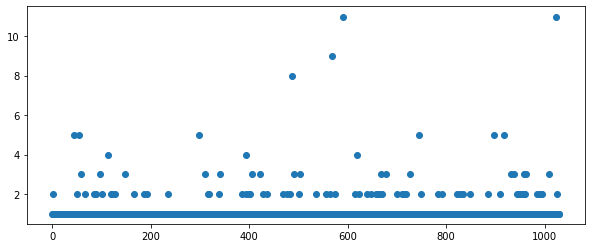

In [26]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders']) 

Большинство клиентов покупает не более 2-х раз. Но есть и те, кто покупает от 5 до 11 раз. 

<b>- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.</b>

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Больше 2-х раз покупает только 5% пользователей. Пользователи, совершившие 4 и более заказа – аномальные.

<b>- Точечный график стоимостей заказов. </b>

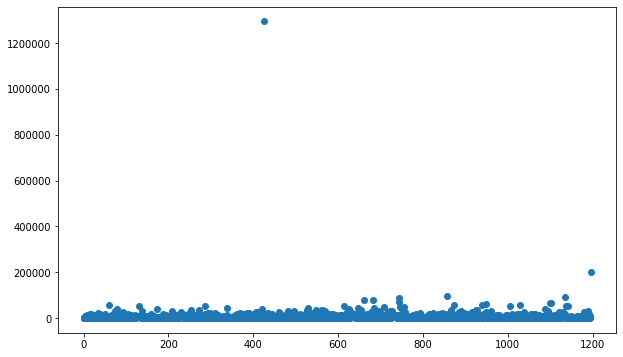

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])
plt.show()

Из-за выбросов на графике выше ничего не видно, уберем их и посмотрим поближе.

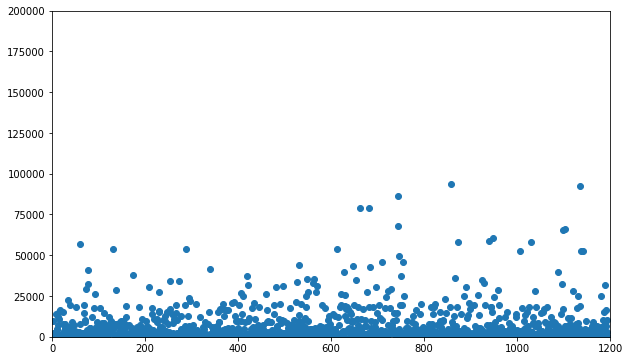

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 200000])
plt.show()

На первом графике видны 2 выброса. В целом видно, что стоимость заказа в среднем составляет до 25 000 у.е.

<b>- Посчитаем 95-й и 99-й перцентили стоимости заказов.</b>

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Стоимость заказа больше 28 000 у.е. только у 5% покупателей. Заказы стоимостью выше 58 233 у.е. – аномалии.

<b>- Статистическая значимость различий в конверсии между группами по «сырым» данным.</b>

In [31]:
conversions = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversions['conversion'] = conversions['orders'] / conversions['visitors']
conversions

,group,orders,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


In [32]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A равна конверсии в группе B
# H1: Конверсия в группе A не равна конверсии в группе B
alpha=0.05
purchases = np.array(conversions['orders'])
leads = np.array(conversions['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу


Z-критерий для оценки разности между двумя долями. P_value равно 0.023, поэтому статистическая значимость есть. 

In [33]:
#выделим количество заказов по пользователям группы A и B
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersB.columns = ['visitorid', 'orders']

In [34]:
#сосдадим списки с числом заказов определённого пользователя sampleA и sampleB по группам 
list_orders_A =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_A.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_A, name = 'orders')

list_orders_B =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_B.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_B, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)

In [35]:
# H0: Конверсия в группе A равна конверсии в группе B
# H1: Конверсия в группе A не равна конверсии в группе B
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

P-value: 0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


In [36]:
#Относительный прирост конверсии группы B по отношению к группе A

relative_cr = (sampleB.mean()/sampleA.mean()-1).round(3)
print(f"Относительный прирост конверсии группы B по отношению к группе A составляет {relative_cr}")

Относительный прирост конверсии группы B по отношению к группе A составляет 0.138


Относительный прирост конверсии группы B по отношению к группе A равняется 0.138. Статистическая значимость равна 0.0168, по «сырым данным» разница между конверсиями каждой группы статистически значима.

<b>- Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. </b>

In [37]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек в группе A равен среднему чеку группы B
# H1: Средний чек A равен среднему чеку группы B

alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [38]:
#Относительное изменение среднего чека в группе B по отношению группы A

relative_avg_check = (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1).round(3)
print(f"Относительное изменение среднего чека в группе B по отношению группы A составляет {relative_avg_check}")

Относительное изменение среднего чека в группе B по отношению группы A составляет 0.259


Относительное изменение среднего чека в группе B по отношению группы A составляет 0.259. Статистическая значимость равняется 0.729, разница между средними чеками не оказалась значимой.

<b>- Статистическая значимость различий в конверсии между группами по «очищенным» данным.</b>

In [39]:
#предельное количество заказов и предельная сумма покупки для формирования списка аномальных пользователей
limit_orders = 2
limit_revenue = 28000

In [40]:
#очищаем данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64

In [41]:
#количество аномальных пользователей

abnormalUsers_count = len(abnormalUsers)
print(f"В датафрейме содержится {abnormalUsers_count} аномальных пользователей.")

В датафрейме содержится 74 аномальных пользователей.


In [42]:
#сосдадим списки с числом заказов определённого пользователя sampleAFiltered и sampleBFiltered по группам
#после очистки данных от аномалий

list_orders_filter_A =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_filter_A.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_filter_A, name = 'orders')

list_orders_filter_B =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_filter_B.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_filter_B, name = 'orders')

sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)


In [43]:
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

P-value: 0.013042592743036758
Отвергаем нулевую гипотезу: разница статистически значима


In [44]:
#Прирост конверсии группы B по отношению к группе A
increase_conv = (sampleBFiltered.mean()/sampleAFiltered.mean()-1).round(3)

print(f"Прирост конверсии группы B по отношению к группе A составляет {increase_conv}")

Прирост конверсии группы B по отношению к группе A составляет 0.173


По очищенным данным относительный прирост конверсии группы B по отношению к группе A равняется 0.173. Статистическая значимость равна 0.013, поэтому по очищенным данным разница между конверсиями каждой группы также статистически значима.

<b>- Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.</b>

In [45]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             True, 'two-sided')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

P-value: 0.738481751314565
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [46]:
arppu_A = (orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean())

print(f"Средняя выручка на одного покупателя группы A – {arppu_A.round(2)}")

Средняя выручка на одного покупателя группы A – 5166.61


In [47]:
arppu_B = orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()
print(f"Средняя выручка на одного покупателя группы B – {arppu_B.round(2)}")

Средняя выручка на одного покупателя группы B – 5065.22


In [48]:
#изменение среднего чека в группе B по отношению группы A после очистки данных
avg_check_changes = (orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1).round(4)

print(f"После очистки данных средний чек в группе B по отношению группы A составил: {avg_check_changes.round(4)}")

После очистки данных средний чек в группе B по отношению группы A составил: -0.0196


Относительное изменение среднего чека по очищенным данным в группе B по отношению группы A составляет -0.0196. Статистическая значимость равняется 0.738, разница между средними чеками не оказалась значимой.

<b> - Примем решение по результатам теста и объясните его. </b>
    
    
<bR>Варианты решений: 
    
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

<b>Создадим новый датафрейм без аномальных пользователей

In [49]:
#убираем всех аномальных пользователей
orders_new = orders.loc[~orders['visitorid'].isin(abnormalUsers)]
orders_new

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [50]:
orders_new_grouped = (orders_new.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_new_grouped['group_1'] = orders_new_grouped ['group']
orders_new_grouped  = orders_new_grouped .set_index(['date','group'])
orders_cumsum_new = orders_new_grouped .sort_values(['date','group']).groupby('group_1').cumsum().reset_index()
orders_cumsum_new.head(5)

,date,group,orders,buyers,revenue
0,2019-08-01,A,16,15,54351
1,2019-08-01,B,19,19,78258
2,2019-08-02,A,35,33,146483
3,2019-08-02,B,40,39,171492
4,2019-08-03,A,59,57,258956


In [51]:
#объединяем с таблицей visitors
cumulative_new = orders_cumsum_new.join(visitors_cumsum[['visitors']])
cumulative_new.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,16,15,54351,719
1,2019-08-01,B,19,19,78258,713
2,2019-08-02,A,35,33,146483,1338
3,2019-08-02,B,40,39,171492,1294
4,2019-08-03,A,59,57,258956,1845


In [52]:
cumulative_new['avg_check'] = cumulative_new['revenue'] / cumulative_new['orders']
cumulative_new['conversion'] = cumulative_new['orders'] / cumulative_new['visitors']
cumulative_new.head()

,date,group,orders,buyers,revenue,visitors,avg_check,conversion
0,2019-08-01,A,16,15,54351,719,3396.937500,0.022253
1,2019-08-01,B,19,19,78258,713,4118.842105,0.026648
2,2019-08-02,A,35,33,146483,1338,4185.228571,0.026158
3,2019-08-02,B,40,39,171492,1294,4287.300000,0.030912
4,2019-08-03,A,59,57,258956,1845,4389.084746,0.031978


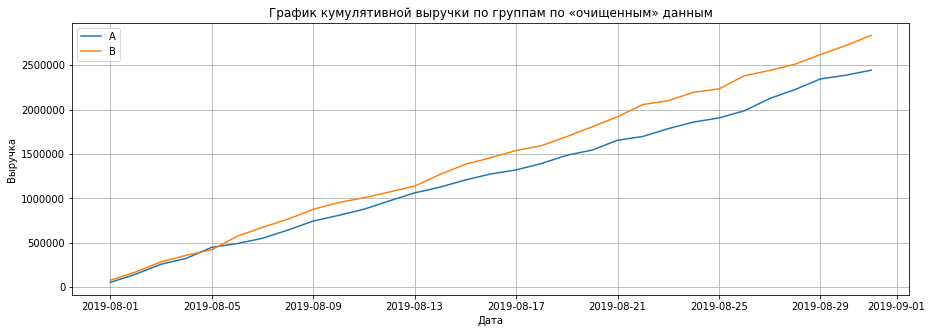

In [53]:
#выручка для каждой из групп
cumulativeRevenueA_new = cumulative_new[cumulative_new['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_new = cumulative_new[cumulative_new['group']=='B'][['date','revenue', 'orders']]

#График кумулятивной выручки по группам
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA_new['date'], cumulativeRevenueA_new['revenue'], label = 'A')
plt.plot(cumulativeRevenueB_new['date'], cumulativeRevenueB_new['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам по «очищенным» данным')
plt.legend()
plt.grid()
plt.show()

На графике виден стабильных рост выручки каждой из групп без аномалий. Выручка группы B больше, чем у группы A. Только 5 августа 2019 года выручка группы B была немного ниже по сравнению с группой A.

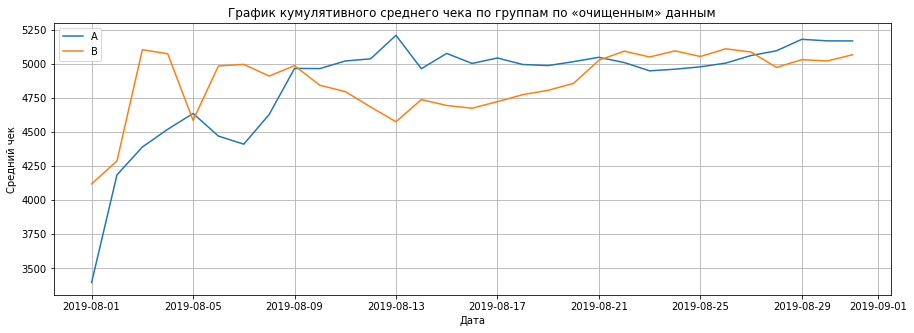

In [54]:
#Графики кумулятивного среднего чека по группам
cumulativeAvgCheckA_new = cumulative_new[cumulative_new['group']=='A'][['date', 'avg_check']]
cumulativeAvgCheckB_new = cumulative_new[cumulative_new['group']=='B'][['date', 'avg_check']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeAvgCheckA_new['date'], cumulativeAvgCheckA_new['avg_check'], label = 'A')
plt.plot(cumulativeAvgCheckB_new['date'], cumulativeAvgCheckB_new['avg_check'], label = 'B')
plt.title('График кумулятивного среднего чека по группам по «очищенным» данным')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show()

Средний чек группы B достиг своего максимума 13 августа 2019 года, где средний чек составил 5200, с тех пор немного варьируется между 5000 и 5200.

Средний чек группы A постоянно скачет в мериод между 22 и 28 августа был выше, чем у группы B. 

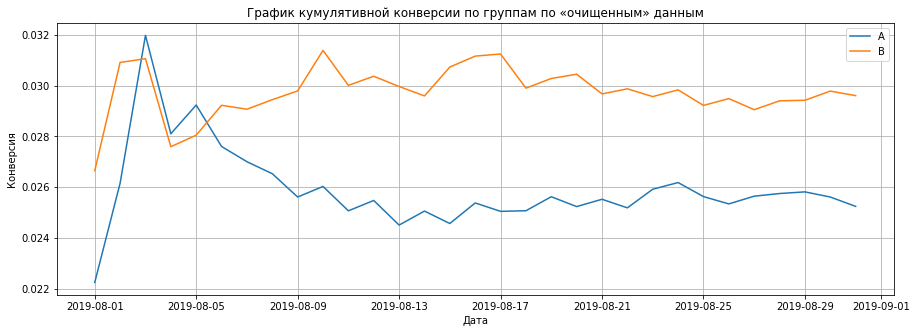

In [55]:
#График кумулятивной конверсии по группам
cumulativeConversionA_new = cumulative_new[cumulative_new['group']=='A'][['date', 'conversion']]
cumulativeConversionB_new = cumulative_new[cumulative_new['group']=='B'][['date', 'conversion']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeConversionA_new['date'], cumulativeConversionA_new['conversion'], label='A')
plt.plot(cumulativeConversionB_new['date'], cumulativeConversionB_new['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам по «очищенным» данным')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.grid()
plt.show()

В начале теста был скачок конверсии у обеих групп. В общем конверсия группы B больше, чем у группы A. Под конец теста конверсия обеих групп стабилизировалась.

<b>Посчитаем среднюю выручку на одного пользователя (ARPU)

<br>

$$ARPU = {CR * ARPPU}$$

CR – Conversion<bR>
ARPPU – Average revenue per paying user


In [56]:
#средняя выручка на одного пользователя группы A
arpu_A = sampleAFiltered.mean() * arppu_A

print(f"Средняя выручка на одного пользователя (не покупателя!) группы A – {arpu_A.round(2)}")

Средняя выручка на одного пользователя (не покупателя!) группы A – 130.75


In [57]:
#средняя выручка на одного пользователя группы B
arpu_B = sampleBFiltered.mean() * arppu_B

print(f"Средняя выручка на одного пользователя (не покупателя!) группы B – {arpu_B.round(2)}")

Средняя выручка на одного пользователя (не покупателя!) группы B – 150.33


In [58]:
#общая выручка по группе A
revenue_A = orders.loc[orders['group'] == 'A']

print(f"Общая выручка группы A составила {revenue_A['revenue'].sum()} у.е.")

Общая выручка группы A составила 4084803 у.е.


In [59]:
#общая выручка по группе B
revenue_B = orders.loc[orders['group'] == 'B']

print(f"Общая выручка группы B составила {revenue_B['revenue'].sum()} у.е.")

Общая выручка группы B составила 5907760 у.е.


In [60]:
revenua_total = revenue_B['revenue'].sum() - revenue_A['revenue'].sum()
print(f"Общая выручка по всем группам – {revenua_total} у.е.")

Общая выручка по всем группам – 1822957 у.е.


<b>Выводы:</b>
<bR>Рассчитав ICE, мы получили наибольшую оценку по гипотезам 8, 0 и 7. По фреймворку RICE в топ вышли гипотезы 7, 2 и 0. Для оценки гипотезы по увеличению выручки нам нужно учитывать охват. Поскольку RICE его учитывает, а ICE нет, наиболее приоритетными гипотезами являются:
    7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

В процессе A/B тестирования были замечены ряд аномальных пользователей: тех, кто совершал более 2-х покупок и тех, кто делал заказы более, чем на 28000 у.е. Они меняли общий вид анализа, поэтому данные были очищены от таких выбросов.

По результатам A/B теста сделаны следующие выводы:   
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами даже после удаления аномалий.
- График относительного изменения кумулятивной конверсии группы B к группе A сообщает, что результаты группы B лучше группы A.
- График относительного изменения кумулятивного среднего чека группы B к группе A колеблется, на нем и видны аномалии. Сделать из этого графика определённые выводы нельзя.
    
Средняя выручка на 1 посетителя группы B составляет 150.33 у.е., общая выручка за весь тест – 5,9 млн. у.е. Средняя выручка на 1 посетителя группы A составляет 130.75 у.е., общая выручка за весь тест – 4,1 млн. у.е. Группа B принесла больше выручки на 1,8 млн. у.е и в целом на 1 посетителя средний чек выше на 20 у.е
    
После удаления аномалий построены графики кумулятичной выручки, среднего чека и конверсии по группам. В целом, группа B везде лидирует. На графике среднего чека разница менее ощутима – под конец теста группа A стремится его догнать и возможно перегнать. 
    
Разница между средними чеками не оказалась значимой, но разница показателей конверсии между группами и до и после очистки данных является статистически значимой.
    
Результаты группы B показывают увеличение выручки и конверсии по сравнению с группой A. Можно заканчивать тест и  внедрять гипотезу в работу организации. 